# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

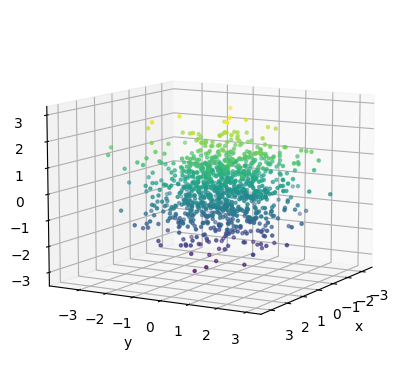

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000
X=np.random.normal(0.0,1.0,M)
Y=np.random.normal(0.0,1.0,M)
Z=np.random.normal(0.0,1.0,M)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## <span style="color:blue"> Svolgimento </span>

L'integrale che bisogna calcolare è:
$$ \langle r \rangle = \int \, dx \, dy \, dz \, \left|\psi(x,y,z,)\right|^2$$

Dove $ \left|\psi(x,y,z,)\right|^2 $ rappresenta la distribuzione di probabilità. È possibile dunque stimare il valore dell'integrale campionando questa probabilità attraverso l'algoritmo di Metropolis.

Si è effettuata la stima dell'integrale scegliendo come probabilità di transizione $T(x,y)$ la distribuzione uniforme, nel primo caso, e una distribuzione gaussiana nel secondo. Il passo è stato scelto in modo tale da avere una accettanza di circa 50%, aumentando così l'efficienza del programma. Un'altro modo per aumentare l'efficienza è scegliere il punto di partenza della simulazione che non sia troppo distante dal centro della distribuzione. In ogni caso, come è possibile osservare, la scelta di un punto molto lontano dal centro non comporta una non corretta esecuzione del programma ma ne inficia unicamente l'efficienza.

Infine, si è eseguito il data blocking e se ne riportano i risultati. 


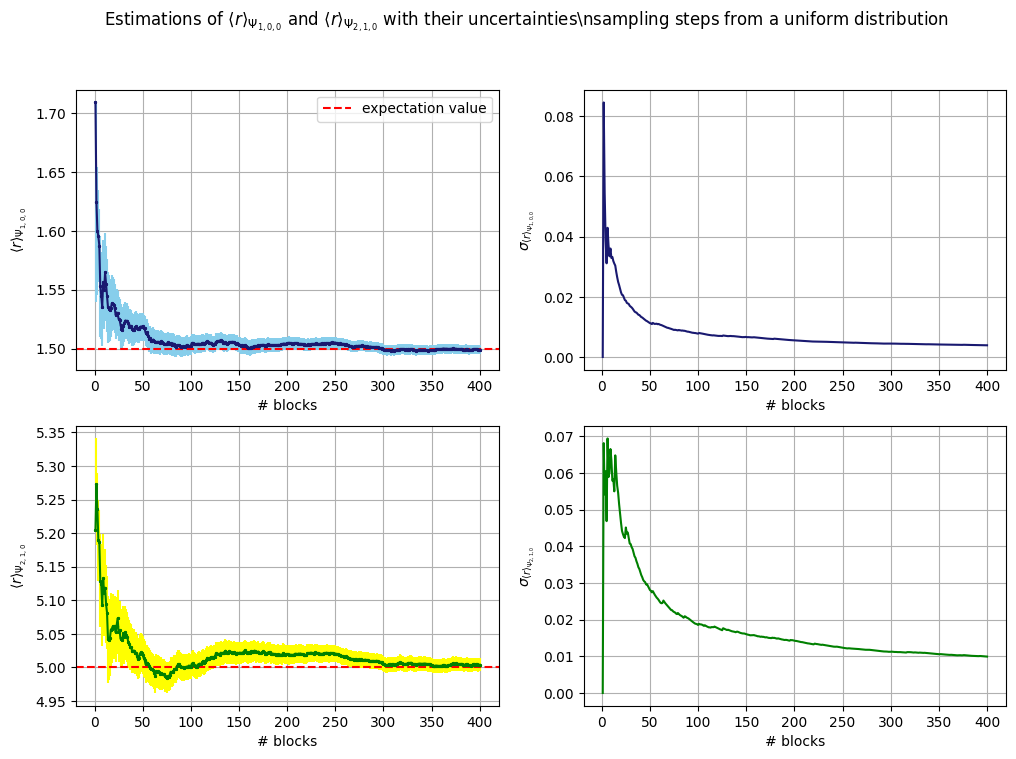

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# Create a figure with a 2x2 grid of subplots and set the overall figure size
fig, plts = plt.subplots(2, 2, figsize=(12, 8))

# Define the quantum states and their expected values
state = ["1s", "2p"]
exp_value = [1.5, 5]  # Expected values for each state
colors = ['midnightblue', 'green', 'skyblue', 'yellow']  # Colors for the plots

# Loop over each state to read data and plot
for i in range(2):
    mean = []  # List to store mean values
    sigma = []  # List to store standard deviation values
    
    # Open the corresponding results file
    with open('results/' + state[i] + '-uniform.out', 'r') as file:
        reader = csv.reader(file)
        next(reader, None)  # Skip the first row (header)
        
        # Read the data from the file
        for list in file:
            elements = list.split()
            mean.append(float(elements[1]))  # Append mean value
            sigma.append(float(elements[2]))  # Append standard deviation value
    
    # Create an array for the x-axis (number of blocks)
    N = np.arange(1, len(mean) + 1)
    
    # Plot mean values with error bars
    plts[i, 0].errorbar(N, mean, yerr=sigma, marker='*', markersize=2, linestyle='-', alpha=1, color=colors[i], ecolor=colors[i+2])
    # Plot the expectation value as a horizontal line
    plts[i, 0].axhline(y=exp_value[i], color='red', linestyle='--', label='expectation value')
    plts[i, 0].set_xlabel('# blocks')  # Set x-axis label for mean plot
    plts[0, 0].set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$')  # Y-axis label for 1s state mean
    plts[1, 0].set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$')  # Y-axis label for 2p state mean
    plts[0, 0].legend()  # Add legend to the first subplot
    plts[i, 0].grid(True)  # Add grid to mean plot
    
    # Plot standard deviation values
    plts[i, 1].plot(N, sigma, color=colors[i])
    plts[i, 1].set_xlabel('# blocks')  # Set x-axis label for sigma plot
    plts[0, 1].set_ylabel(r'$\sigma_{\left\langle r \right\rangle_{\Psi_{1,0,0}}}$')  # Y-axis label for 1s state sigma
    plts[1, 1].set_ylabel(r'$\sigma_{\left\langle r \right\rangle_{\Psi_{2,1,0}}}$')  # Y-axis label for 2p state sigma
    plts[i, 1].grid(True)  # Add grid to sigma plot

# Set the overall title for the figure
fig.suptitle(r'Estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ with their uncertainties, sampling steps from a uniform distribution')

# Display the plots
plt.show()

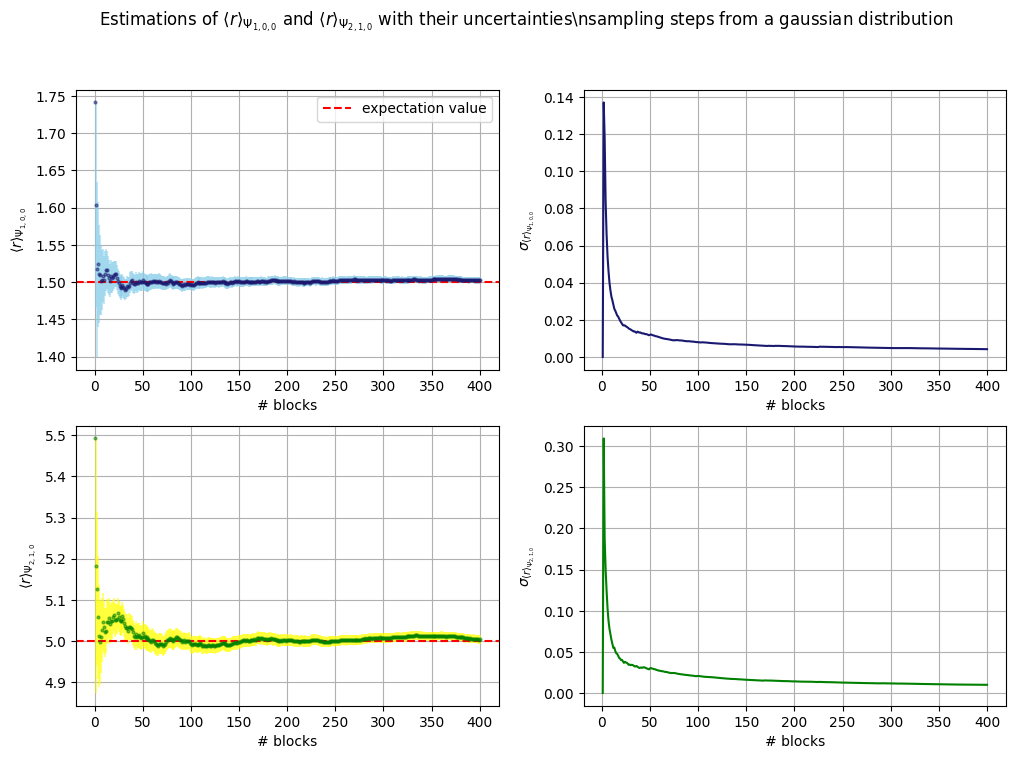

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# Create a figure with a 2x2 grid of subplots and set the overall figure size
fig, plts = plt.subplots(2, 2, figsize=(12, 8))

# Define the quantum states and their expected values
state = ["1s", "2p"]
exp_value = [1.5, 5]  # Expected values for each state
colors = ['midnightblue', 'green', 'skyblue', 'yellow']  # Colors for the plots

# Loop over each state to read data and plot
for i in range(2):
    mean = []  # List to store mean values
    sigma = []  # List to store standard deviation values
    
    # Open the corresponding results file
    with open('results/' + state[i] + '-gaussian.out', 'r') as file:
        reader = csv.reader(file)
        next(reader, None)  # Skip the first row (header)
        
        # Read the data from the file
        for list in file:
            elements = list.split()
            mean.append(float(elements[1]))  # Append mean value
            sigma.append(float(elements[2]))  # Append standard deviation value
    
    # Create an array for the x-axis (number of blocks)
    N = np.arange(1, len(mean) + 1)
    
    # Plot mean values with error bars
    plts[i, 0].errorbar(N, mean, yerr=sigma, marker='o', markersize=2, linestyle='', alpha=0.5, color=colors[i], ecolor=colors[i+2])
    # Plot the expectation value as a horizontal line
    plts[i, 0].axhline(y=exp_value[i], color='red', linestyle='--', label='expectation value')
    plts[i, 0].set_xlabel('# blocks')  # Set x-axis label for mean plot
    plts[0, 0].set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$')  # Y-axis label for 1s state mean
    plts[1, 0].set_ylabel(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$')  # Y-axis label for 2p state mean
    plts[0, 0].legend()  # Add legend to the first subplot
    plts[i, 0].grid(True)  # Add grid to mean plot
    
    # Plot standard deviation values
    plts[i, 1].plot(N, sigma, color=colors[i])
    plts[i, 1].set_xlabel('# blocks')  # Set x-axis label for sigma plot
    plts[0, 1].set_ylabel(r'$\sigma_{\left\langle r \right\rangle_{\Psi_{1,0,0}}}$')  # Y-axis label for 1s state sigma
    plts[1, 1].set_ylabel(r'$\sigma_{\left\langle r \right\rangle_{\Psi_{2,1,0}}}$')  # Y-axis label for 2p state sigma
    plts[i, 1].grid(True)  # Add grid to sigma plot

# Set the overall title for the figure
fig.suptitle(r'Estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ with their uncertainties and sampling steps from a gaussian distribution')

# Display the plots
plt.show()

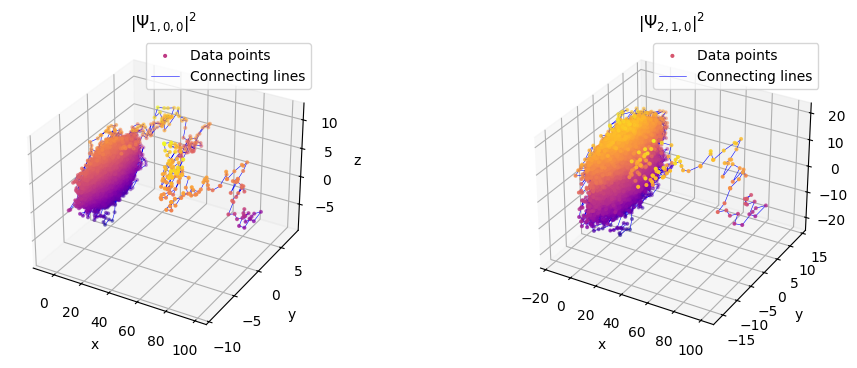

In [29]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools
import numpy as np
import csv

# Initialize empty lists to store data points
X=[]
Y=[]
Z=[]

# Create a figure with two subplots, each with 3D projection
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121, projection='3d')
ax_ = fig.add_subplot(122, projection='3d')

# Reading data from 'steps-1s-uniform.out' file and populating lists X, Y, Z
with open('results/steps-1s-uniform.out', 'r') as file:
    reader = csv.reader(file)
    for list in file:
        elements = list.split()
        X.append(float(elements[0]))
        Y.append(float(elements[1]))
        Z.append(float(elements[2]))

# Plotting data on the first subplot
ax.scatter(X, Y, Z, c=Z, cmap='plasma', marker='.' , s=15 , label='Data points') # Scatter plot
ax.plot(X, Y, Z, linewidth=0.4, color='blue', linestyle='-', label='Connecting lines')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'$\left| \Psi_{1,0,0} \right|^2$')
ax.legend()

# Reset lists X, Y, Z for storing data from 'steps-2p-uniform.out' file
X = []
Y = []
Z = []

# Reading data from 'steps-2p-uniform.out' file and populating lists X, Y, Z
with open('results/steps-2p-uniform.out', 'r') as file:
    reader = csv.reader(file)
    for list in file:
        elements = list.split()
        X.append(float(elements[0]))
        Y.append(float(elements[1]))
        Z.append(float(elements[2]))

# Plotting data on the second subplot
ax_.scatter(X, Y, Z, c=Z, cmap='plasma' , marker='.' , s=15, label='Data points')
ax_.plot(X, Y, Z, linewidth=0.4, color='blue' , label='Connecting lines')
ax_.set_xlabel('x')
ax_.set_ylabel('y')
ax_.set_zlabel('z')
ax_.set_title(r'$\left| \Psi_{2,1,0} \right|^2$')
ax_.legend()

plt.show()